In [952]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pandas_datareader as data
import yfinance as yf

In [953]:
start = '2012-01-01'
end = '2023-05-10'

df = yf.download('^BSESN',start,end)

df.shape

[*********************100%***********************]  1 of 1 completed


(2785, 6)

In [954]:
df = df.reset_index()
df=df.drop(['Date','Adj Close'],axis=1)
df

,Open,High,Low,Close,Volume
0,15640.559570,15970.309570,15640.559570,15939.360352,16200
1,15967.490234,16004.690430,15822.320312,15882.639648,17800
2,15893.070312,15980.169922,15809.309570,15857.080078,21200
3,15789.080078,16001.309570,15664.910156,15867.730469,17200
4,15840.219727,15871.509766,15678.299805,15814.719727,11200
...,...,...,...,...,...
2780,61274.960938,61274.960938,61024.441406,61193.300781,6100
2781,61258.128906,61797.910156,61119.558594,61749.250000,8100
2782,61163.101562,61585.500000,61002.171875,61054.289062,5600
2783,61166.089844,61854.191406,61166.089844,61764.250000,7900


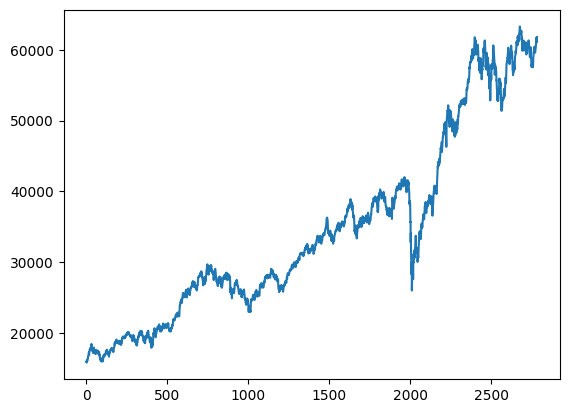

In [955]:
plt.plot(df.Close)

In [956]:
mavg_days=10

In [957]:
mavg = df.Close.rolling(mavg_days).mean()
mavg.shape

(2785,)

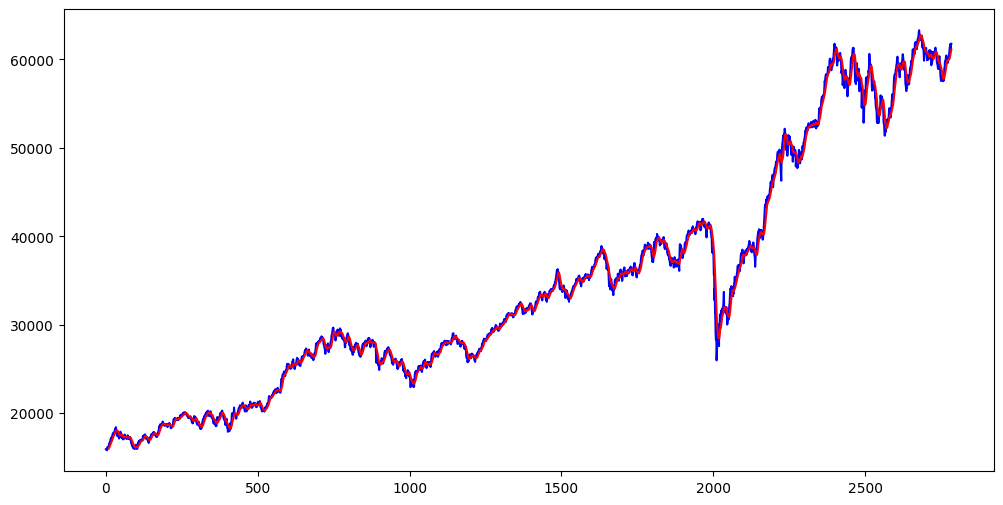

In [958]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,'b')
plt.plot(mavg,'r')

In [959]:
df.shape

(2785, 5)

In [960]:
# splitting data into training and testing samples
data_training = pd.DataFrame(df['Close'][:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):])

In [961]:
print(data_training.shape[0] + data_testing.shape[0])
print(data_training.shape)
print(data_testing.shape)

2785
(1949, 1)
(836, 1)


In [962]:
print(data_training.head())
print(data_testing.head())

          Close
0  15939.360352
1  15882.639648
2  15857.080078
3  15867.730469
4  15814.719727
             Close
1949  41681.539062
1950  41642.660156
1951  41461.261719
1952  41163.761719
1953  41575.140625


In [963]:
# scaling down the data using Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [964]:
data_training_array = scaler.fit_transform(data_training)
type(data_training_array)

numpy.ndarray

In [965]:
data_training_array[0,0]


0.004819971795128719

In [966]:
print(data_training_array)

[[0.00481997]
 [0.00262653]
 [0.00163812]
 ...
 [0.98755762]
 [0.99553925]
 [1.        ]]


In [967]:
x_train = []
y_train = []
for i in range(mavg_days,data_training_array.shape[0]):
    x_train.append(data_training_array[i-mavg_days:i])
    y_train.append(data_training_array[i,0])
x_train= np.array(x_train)

In [968]:
y_train = np.array(y_train)
y_train

array([0.02518759, 0.02462377, 0.03205901, ..., 0.98755762, 0.99553925,
       1.        ])

In [969]:
x_train = x_train.squeeze()
x_train

array([[0.00481997, 0.00262653, 0.00163812, ..., 0.0086155 , 0.01314427,
        0.01448771],
       [0.00262653, 0.00163812, 0.00204998, ..., 0.01314427, 0.01448771,
        0.02518759],
       [0.00163812, 0.00204998, 0.        , ..., 0.01448771, 0.02518759,
        0.02462377],
       ...,
       [0.96138811, 0.96814933, 0.96541533, ..., 0.95776316, 0.97431433,
        0.97156899],
       [0.96814933, 0.96541533, 0.95248216, ..., 0.97431433, 0.97156899,
        0.98755762],
       [0.96541533, 0.95248216, 0.95411722, ..., 0.97156899, 0.98755762,
        0.99553925]])

## Training the model using SVR

In [970]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')


In [971]:
regressor.fit(x_train, y_train)

SVR(kernel='linear')

In [972]:
past_mvavg_days = data_training.tail(mavg_days)
data_testing

,Close
1949,41681.539062
1950,41642.660156
1951,41461.261719
1952,41163.761719
1953,41575.140625
...,...
2780,61193.300781
2781,61749.250000
2782,61054.289062
2783,61764.250000


In [973]:
final_df = past_mvavg_days.append(data_testing, ignore_index = True)
final_df = final_df.to_numpy()
final_df.shape

/tmp/ipykernel_16156/3505781674.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_mvavg_days.append(data_testing, ignore_index = True)


(846, 1)

In [974]:
input_data = scaler.fit_transform(final_df)

In [975]:
x_test = []
y_test = []

for i in range(mavg_days, input_data.shape[0]):
    x_test.append(input_data[i-mavg_days:i])
    y_test.append(input_data[i, 0])

x_test = np.array(x_test)
y_test = np.array(y_test)
    

In [976]:
print(x_test.shape)
print(y_test.shape)


(836, 10, 1)
(836,)


In [977]:
x_test

array([[[0.38774166],
        [0.38887512],
        [0.38223889],
        ...,
        [0.41205672],
        [0.41758975],
        [0.42068204]],

       [[0.38887512],
        [0.38223889],
        [0.38686832],
        ...,
        [0.41758975],
        [0.42068204],
        [0.42088624]],

       [[0.38223889],
        [0.38686832],
        [0.39140256],
        ...,
        [0.42068204],
        [0.42088624],
        [0.41984399]],

       ...,

       [[0.90210319],
        [0.90271191],
        [0.91346288],
        ...,
        [0.94827539],
        [0.94394839],
        [0.95885201]],

       [[0.90271191],
        [0.91346288],
        [0.91546298],
        ...,
        [0.94394839],
        [0.95885201],
        [0.94022182]],

       [[0.91346288],
        [0.91546298],
        [0.9200167 ],
        ...,
        [0.95885201],
        [0.94022182],
        [0.95925412]]])

In [978]:
x_test = x_test.squeeze()


In [979]:
y_test.shape

(836,)

In [980]:
y_predicted = regressor.predict(x_test)
y_train_predicted = regressor.predict(x_train)

In [981]:
y_predicted.shape

(836,)

In [982]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [983]:
y_train_predicted = scaler.inverse_transform(y_train_predicted.reshape(-1,1))
y_train = scaler.inverse_transform(y_train.reshape(-1,1))

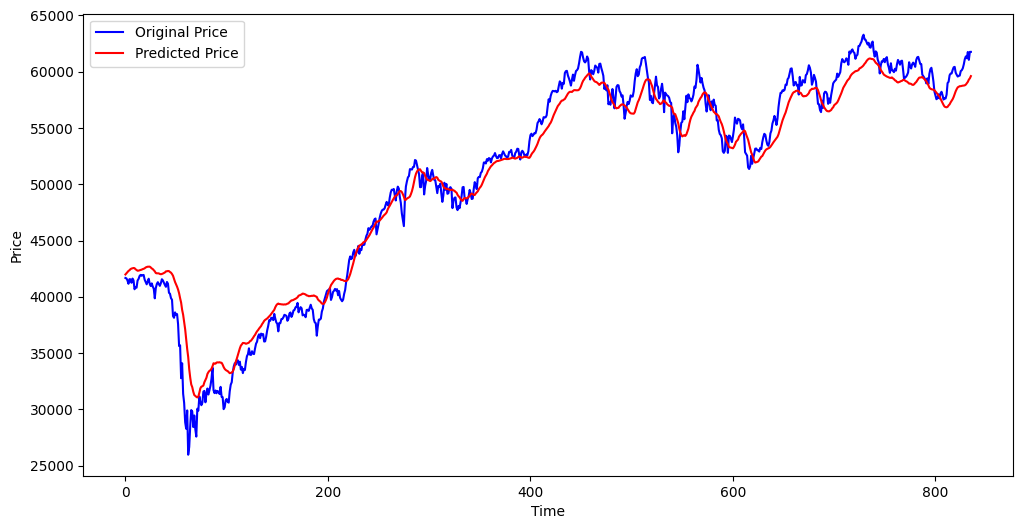

In [984]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label = 'Original Price')
plt.plot(y_predicted,'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

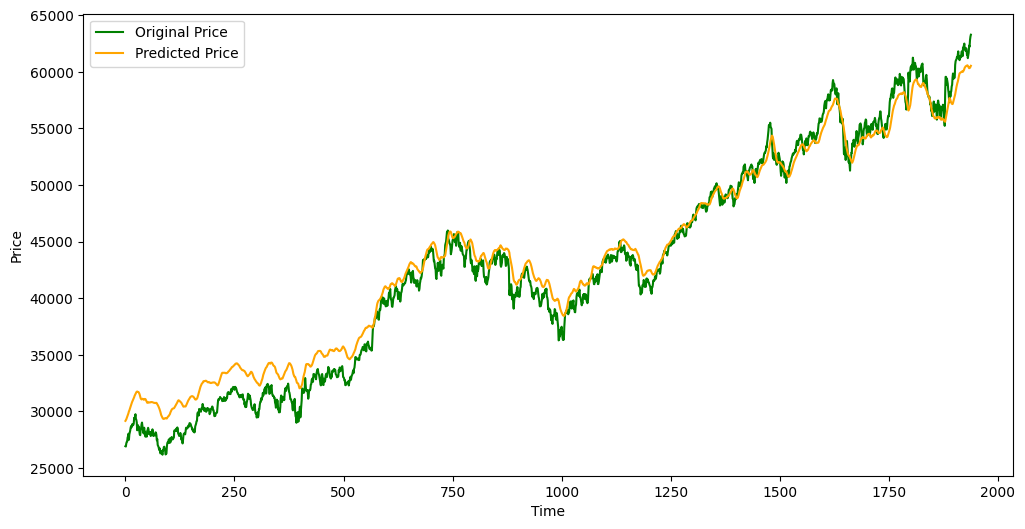

In [985]:
plt.figure(figsize=(12,6))
plt.plot(y_train,'green', label = 'Original Price')
plt.plot(y_train_predicted,'orange', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [986]:
x_test[0].shape
y_test[1]

array([41642.66015625])

In [987]:
from sklearn import metrics

In [988]:
test_score = metrics.mean_squared_error(y_test,y_predicted)
train_score = metrics.mean_squared_error(y_train,y_train_predicted)

In [989]:
print("test error :",test_score)
print("train error :",train_score)

test error : 2702335.3364721937
train error : 2521954.867164463


In [990]:
import pickle

In [991]:
pkl_filename = "stock-pred-SVR-model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(regressor, file)


In [992]:
mavg_days

10

In [1003]:
next_x_days=2
closing_price_for_future=[]
last_price = scaler.fit_transform(y_test)
last_price = last_price.squeeze()
total_len = last_price.shape[0]
last_price = last_price[total_len-mavg_days:]
print(last_price)

[0.91546298 0.9200167  0.92936718 0.94178075 0.94827539 0.94394839
 0.95885201 0.94022182 0.95925412 0.9591758 ]


In [1004]:
for i in range(next_x_days):
    total_len = last_price.shape[0]
    test_data = last_price[total_len-mavg_days:]
    test_data = test_data.reshape((1,mavg_days))
    pred_price = regressor.predict(test_data)
    closing_price_for_future.append(pred_price)
    last_price = np.append(last_price,pred_price)


In [1005]:
closing_price_for_future = np.array(closing_price_for_future)
closing_price_for_future.shape

(2, 1)

In [1006]:
closing_price_for_future = scaler.inverse_transform(closing_price_for_future.reshape(-1,1))

In [1007]:
closing_price_for_future.shape

(2, 1)

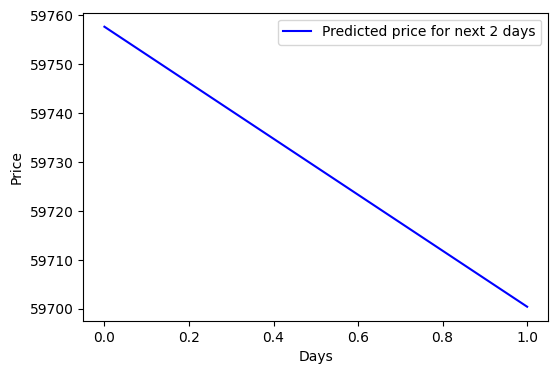

In [1008]:
plt.figure(figsize=(6,4))
label = f'Predicted price for next {next_x_days} days'
plt.plot(closing_price_for_future,'blue', label = label)
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [1009]:
last_price = scaler.inverse_transform(last_price.reshape(-1,1))
last_price

array([[60130.7109375 ],
       [60300.578125  ],
       [60649.37890625],
       [61112.44140625],
       [61354.7109375 ],
       [61193.30078125],
       [61749.25      ],
       [61054.2890625 ],
       [61764.25      ],
       [61761.328125  ],
       [59757.68315269],
       [59700.43695313]])

In [1010]:
predicted_table = pd.DataFrame(
    closing_price_for_future,
    columns=['Price'])
predicted_table.index = predicted_table.index+1
predicted_table.index.name = 'Days'

In [1011]:
predicted_table

,Price
Days,
1,59757.683153
2,59700.436953
